In [1]:
from qiskit import *

In [24]:
num = '011'

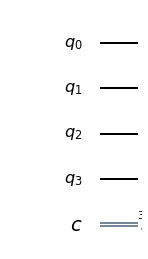

In [25]:
circuit = QuantumCircuit(len(num)+1,len(num))
circuit.draw(output='mpl')

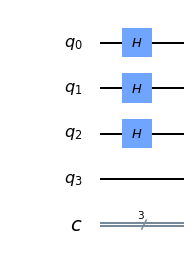

In [26]:
circuit.h(range(len(num)))
circuit.draw(output='mpl')

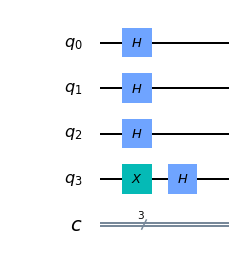

In [27]:
circuit.x(len(num))
circuit.h(len(num))
circuit.draw(output='mpl')

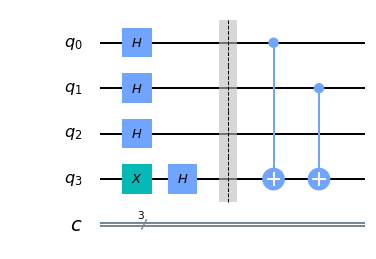

In [28]:
circuit.barrier()
for i,j in enumerate(reversed(num)):
    if j == '1':
        circuit.cx(i,len(num))
circuit.draw(output='mpl')

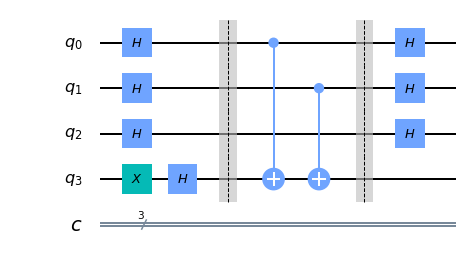

In [29]:
circuit.barrier()
circuit.h(range(len(num)))
circuit.draw(output='mpl')

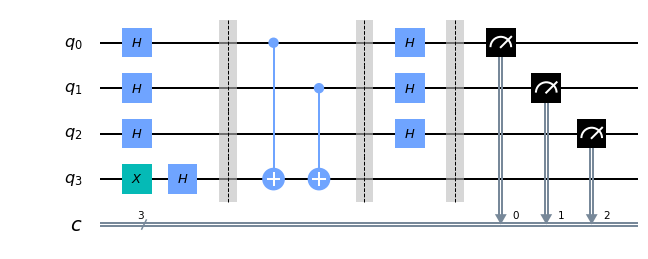

In [30]:
circuit.barrier()
circuit.measure(range(len(num)),range(len(num)))
circuit.draw(output='mpl')

In [31]:
count = execute(circuit, Aer.get_backend('qasm_simulator')).result().get_counts()

In [32]:
from qiskit.tools.visualization import plot_histogram

In [33]:
print(count)

{'011': 1024}


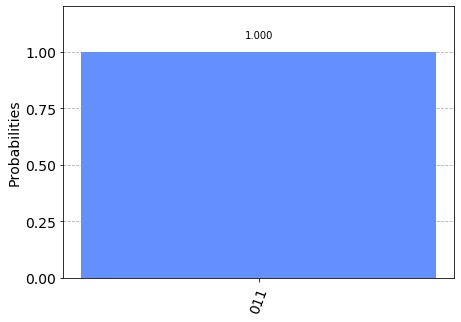

In [34]:
plot_histogram(count)

In [35]:
from qiskit.tools import job_monitor

In [36]:
IBMQ.load_account()
provider = IBMQ.get_provider()

ibmqfactory.load_account:WARNING:2020-06-12 18:58:25,767: Credentials are already in use. The existing account in the session will be replaced.


In [37]:
job = execute(circuit, provider.get_backend('ibmq_london'))

In [38]:
job_monitor(job)

Job Status: job has successfully run


In [39]:
counts = job.result().get_counts()


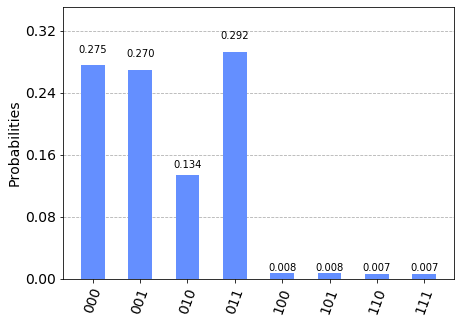

In [40]:
plot_histogram(counts)